In [1]:
# Import Data
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
df1 = pd.read_csv('./Data/Dt_0116_m565_XT.csv')
df2 = pd.read_csv('./Data/Dt_0116_m565_YT.csv')
del df2['Unnamed: 0']
del df2['Dt']

In [2]:
# Split Data - Train & Test
n_train = 8000
X = df1.values
Y = df2.values

In [3]:
X.shape

(8928, 53)

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X[:8900])
Y = scaler.fit_transform(Y[:8900])

In [5]:
n_train = 8000
train_X = X[:n_train, :]
test_X = X[n_train:,:]
train_Y = Y[:n_train,1]
test_Y = Y[n_train:,1]

In [6]:
print(train_Y[7000])

0.991649781205


In [7]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape

(8000, 1, 53)

In [8]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

Using TensorFlow backend.


In [9]:
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_Y, epochs=100, batch_size=100, validation_data=(test_X, test_Y), verbose=1, shuffle=False)

Train on 8000 samples, validate on 900 samples
Epoch 1/100
8000/8000 [==============================] - 0s - loss: 0.1912 - val_loss: 0.0470
Epoch 2/100
8000/8000 [==============================] - 0s - loss: 0.0642 - val_loss: 0.0424
Epoch 3/100
8000/8000 [==============================] - ETA: 0s - loss: 0.059 - 0s - loss: 0.0576 - val_loss: 0.0363
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 0.0526 - val_loss: 0.0374
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 0.0499 - val_loss: 0.0362
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 0.0482 - val_loss: 0.0332
Epoch 7/100
8000/8000 [==============================] - 0s - loss: 0.0468 - val_loss: 0.0323
Epoch 8/100
8000/8000 [==============================] - 0s - loss: 0.0467 - val_loss: 0.0300
Epoch 9/100
8000/8000 [==============================] - 0s - loss: 0.0466 - val_loss: 0.0285
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 0.0467 - val_l

8000/8000 [==============================] - 0s - loss: 0.0340 - val_loss: 0.0225
Epoch 87/100
8000/8000 [==============================] - 0s - loss: 0.0338 - val_loss: 0.0225
Epoch 88/100
8000/8000 [==============================] - 0s - loss: 0.0338 - val_loss: 0.0225
Epoch 89/100
8000/8000 [==============================] - 0s - loss: 0.0337 - val_loss: 0.0225
Epoch 90/100
8000/8000 [==============================] - 0s - loss: 0.0337 - val_loss: 0.0225
Epoch 91/100
8000/8000 [==============================] - 0s - loss: 0.0338 - val_loss: 0.0226
Epoch 92/100
8000/8000 [==============================] - 0s - loss: 0.0336 - val_loss: 0.0226
Epoch 93/100
8000/8000 [==============================] - 0s - loss: 0.0336 - val_loss: 0.0225
Epoch 94/100
8000/8000 [==============================] - 0s - loss: 0.0335 - val_loss: 0.0226
Epoch 95/100
8000/8000 [==============================] - 0s - loss: 0.0334 - val_loss: 0.0224
Epoch 96/100
8000/8000 [==============================] - 0s - 

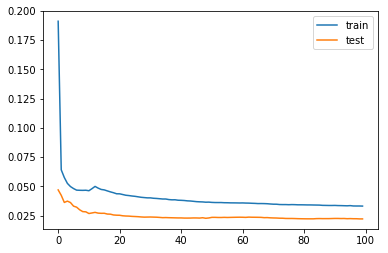

In [10]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

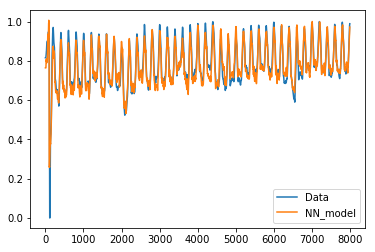

In [11]:
y_pred = model.predict(train_X)
pyplot.plot(train_Y, label='Data')
pyplot.plot(y_pred, label='NN_model')
pyplot.legend()
pyplot.show()

In [12]:
from sklearn import metrics
print(metrics.r2_score(train_Y,y_pred))
print(metrics.r2_score(test_Y,model.predict(test_X)))
print(metrics.mean_squared_error(train_Y,model.predict(train_X)))
print(metrics.mean_squared_error(test_Y,model.predict(test_X)))
#metrics.mean_squared_error(train_Y,y_pred)

0.87483951112
0.912814492212
0.00146254575178
0.000890322583975


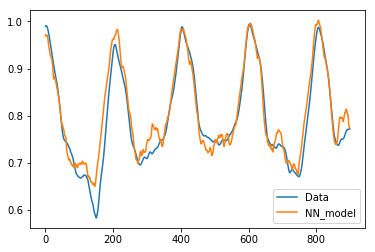

In [13]:
y_pred_test = model.predict(test_X)
pyplot.plot(test_Y, label='Data')
pyplot.plot(y_pred_test, label='NN_model')
pyplot.legend()
pyplot.show()